In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pennylane as qml

In [5]:
symbols = ["H", "H"]
distance = 1.35
coordinates = np.array([[0.0, 0.0, -distance / 2], [0.0, 0.0, distance / 2]])
molecule = qml.qchem.Molecule(symbols, coordinates)
hamiltonian, qubits = qml.qchem.molecular_hamiltonian(molecule)

(<Figure size 800x500 with 1 Axes>, <Axes: >)


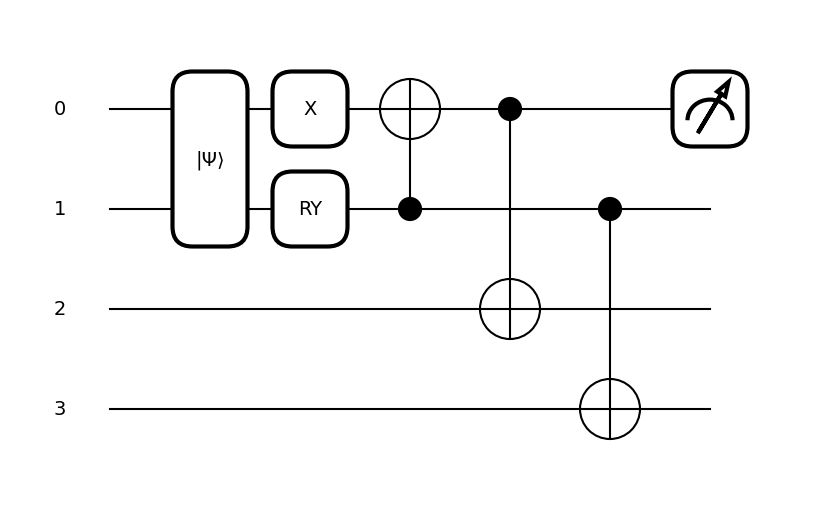

In [21]:
dev = qml.device("default.qubit", wires=qubits)
@qml.qnode(dev)
def h2_ansatz(angle, observable=qml.PauliZ(0)):
    qml.BasisState(np.array([0,0]), wires=[0,1])
    qml.X(wires=0)
    qml.RY(angle, wires=1)
    qml.CNOT(wires=[1,0])
    qml.CNOT(wires=[0,2])
    qml.CNOT(wires=[1,3])
    return qml.expval(observable)

print(qml.drawer.draw_mpl(h2_ansatz)(0))

Text(0, 0.5, 'Energy (hartree)')

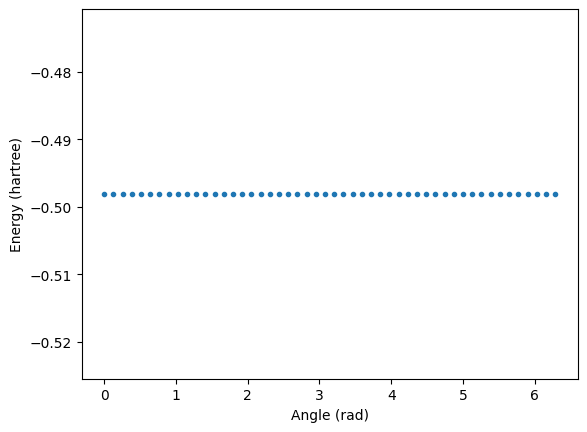

In [16]:
angles = np.linspace(0, 2 * np.pi)
var_energies = h2_ansatz(angles, hamiltonian)
fig, ax = plt.subplots(1, 1)
ax.plot(angles, var_energies, ".")
ax.set_xlabel("Angle (rad)")
ax.set_ylabel("Energy (hartree)")

In [ ]:
distances = np.linspace(0.6, 4, 100)
lowest_energies = np.zeros(distances.shape)
for i, distance in enumerate(distances):
    pass
fig, ax = plt.subplots(1, 1)
ax.plot(distances, lowest_energies, ".")
ax.set_xlabel("Distance (a_0)")
ax.set_ylabel("Energy (hartree)")